## Darwin Challenge
### Descirption

For this challenge we provide you with data recording all unplanned stop events since 2017 on a series of wind turbines. 

Train data file:

File containing logs from 2017 to 2019, describing each downtime for each wind turbine. The Duration_categoriesis the column we want to predict; the categories have been mapped into numbers for computing a metric, but behind the numbers are the following stopping times categories:
<=30 minutes: 1
]30 minutes-3hours]: 2
]3 hours-24 hours]: 3
]24 hours-7 days]: 4
> 7 days: 5
Turbines names MAC_CODE have been anonymized, but consistently refer to the same wind farm when relevant.
You are also given Duration column, as it is more precise than Duration_categories and could possibly help for training ; but it does not exist in the test file and we want to predict Duration_categories.
Test data file:

File containing logs in 2020, describing each downtime. The Duration_categories (and also Duration) is missing, that is what we want to predict.
The test logs file contains the same wind turbines as in the train logs file.
Turbines names MAC_CODE have been anonymized, but consistently refer to the same wind farm when relevant.

### Goal

Predict Duration Categories of wind turbine stop


### Input
#### Categorical

- JDB_ID ==> One value for each row (useless)
- MAC_CODE ==> Name of the Parc? (440 unique values)
- Type ==> 3 values 
- Cause ==> 964 values 
- Component ==> 30 values 
- Comment1 ==> 3421 values 
- Comment2 ==> 1031 values 
- Comment3 ==> 520 values 
- Comment_forced ==> 5702 values 
- Automated ==> 2 values 
- To_be_validated ==> 2 values
- Standard_alarm ==> 7 values
- Responsible_party ==> 2 values
- IEC_stop_category ==> 5 values
- Assignment ==> 3 values
- Pmax ==> 8 values
- Manufacturer ==> 2 values
- Model ==> 16 values
- Date_time_start ==> 82216 values 


In [210]:
import pandas as pd
import numpy as np
from numpy import where
import datetime as dt
import timeit 
import os
from tabulate import tabulate
from pandas import read_json
from beautifultable import BeautifulTable
from pandas import HDFStore
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import json
import ast   
# example of learned embedding encoding for a neural network
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.merge import concatenate
from keras.utils import plot_model
import pandas
import bisect
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from collections import Counter
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#%matplotlib notebook
from pymercure import Client
from datetime import datetime, date
plt.rcParams["figure.figsize"] = (17,10)

In [223]:
df = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/train_logs.csv')#.set_index('Date_time_start')
df

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4,8,10,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JDB_ID,Duration,Date_time_start,MAC_CODE,Type,Cause,Component,Comment1,Comment2,Comment3,...,Automated,To_be_validated,Standard_alarm,Responsible_party,IEC_stop_category,Assignment,Pmax,Manufacturer,Model,Duration_categories
0,84272,526,2017-01-01 02:37:00,PARK79_E11,PANNE,NaN,NON,GearHydrWatPumpLevelLow 0m^3,NaN,NaN,...,0,NaN,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
1,84273,528,2017-01-01 02:37:41,PARK79_E11,PANNE,NaN,NON,Alm_2985 : GearHydrWatPumpLevelLow___m^3-,OK niveau cooling bas,NaN,...,1,0.0,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
2,69548,0,2017-01-01 07:15:44,PARK71_E4,PANNE,NaN,PWR,ALM_3532 : Min. voltage cut in-,NaN,NaN,...,1,0.0,KOA/grid,2,1.0,20,2050,manufacturer_1,model_3,1
3,69005,1,2017-01-01 07:15:44,PARK71_E3,PANNE,NaN,PWR,ALM_3532 : Min. voltage cut in-,NaN,NaN,...,1,0.0,KOA/grid,2,1.0,20,2050,manufacturer_1,model_3,1
4,68463,1,2017-01-01 07:15:44,PARK71_E2,PANNE,NaN,PWR,ALM_3532 : Min. voltage cut in-,NaN,NaN,...,1,0.0,KOA/grid,2,1.0,20,2050,manufacturer_1,model_3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86368,11606,46,2019-12-31 22:59:16,PARK17_E02,NaN,NaN,NOW,ALM_8000 : Park master stop-,NaN,KBE / contract end senvion,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,2
86369,13747,46,2019-12-31 22:59:17,PARK17_E07,NaN,NaN,NOW,ALM_8000 : Park master stop-,NaN,KBE / change of contract,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,2
86370,27987,533,2019-12-31 23:10:54,PARK41_E01,NaN,NaN,NOW,ALM_21 : Manual stop - remote-,NaN,KBE / contract end senvion,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,3
86371,24872,130,2019-12-31 23:11:12,PARK37_E01,NaN,NaN,NOW,ALM_21 : Manual stop - remote-,NaN,KBE / contract end senvion,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,2


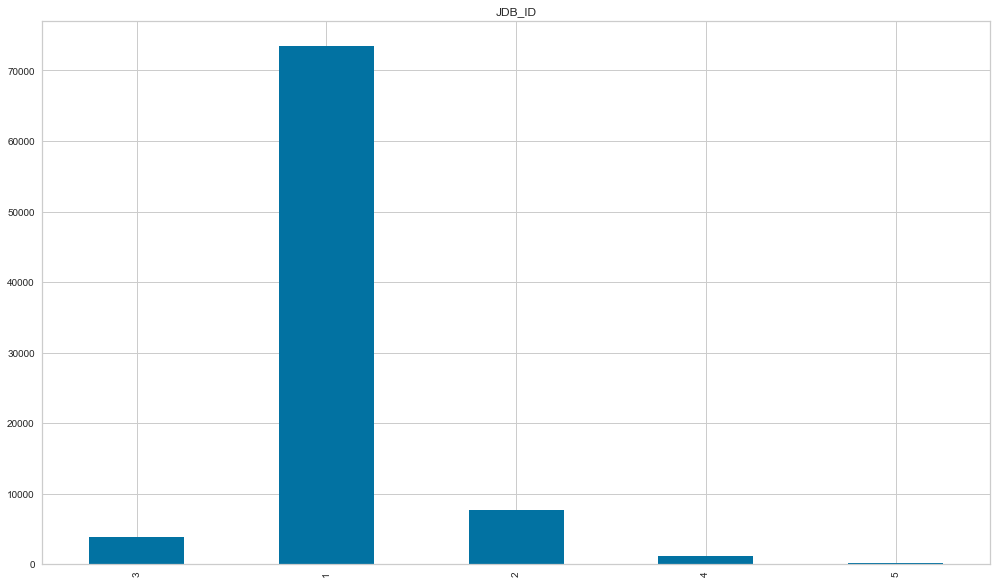

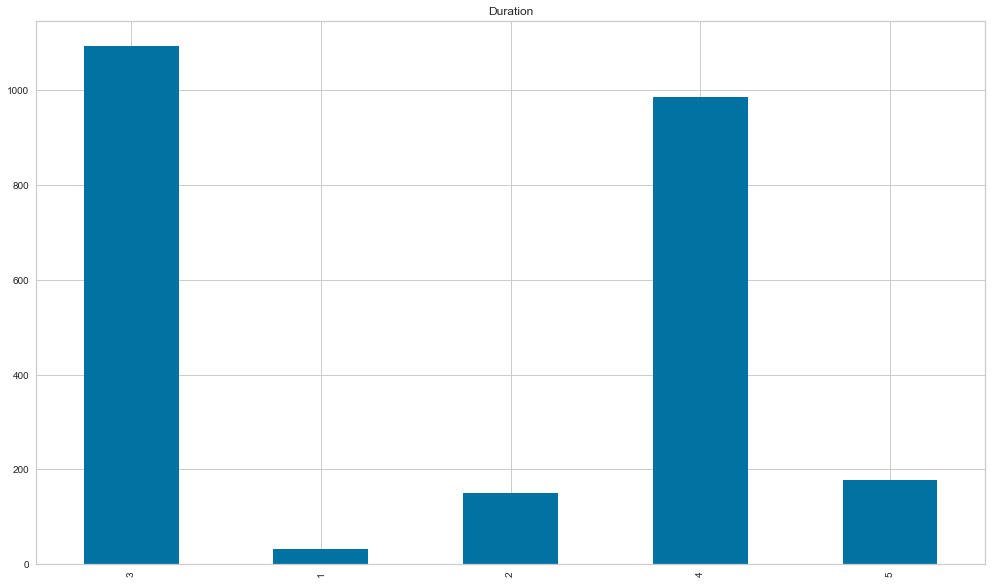

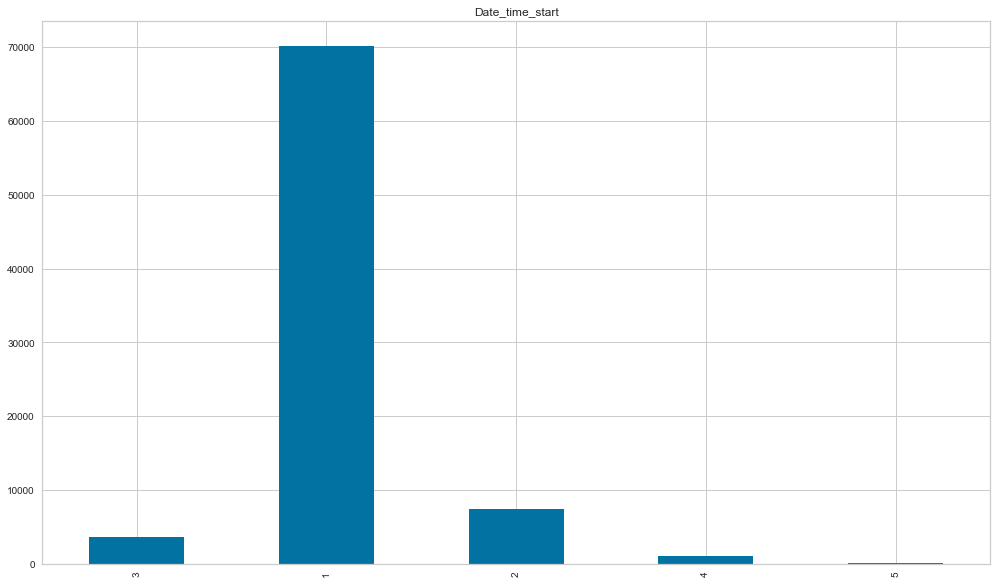

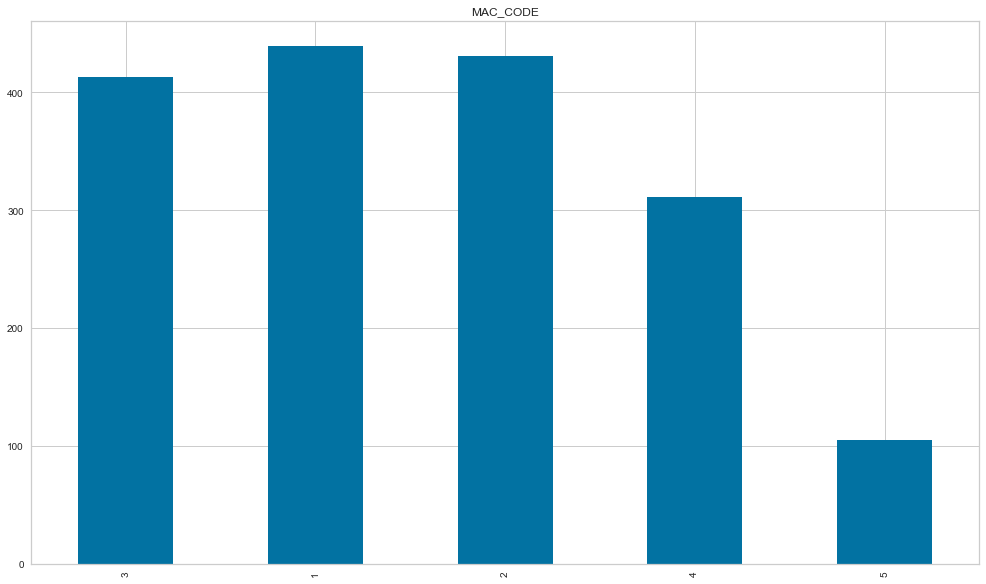

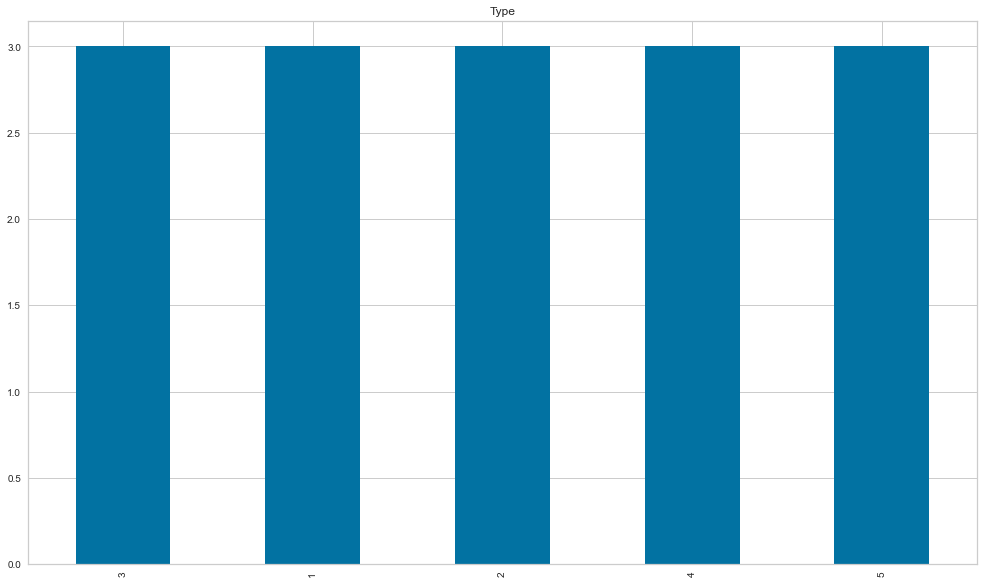

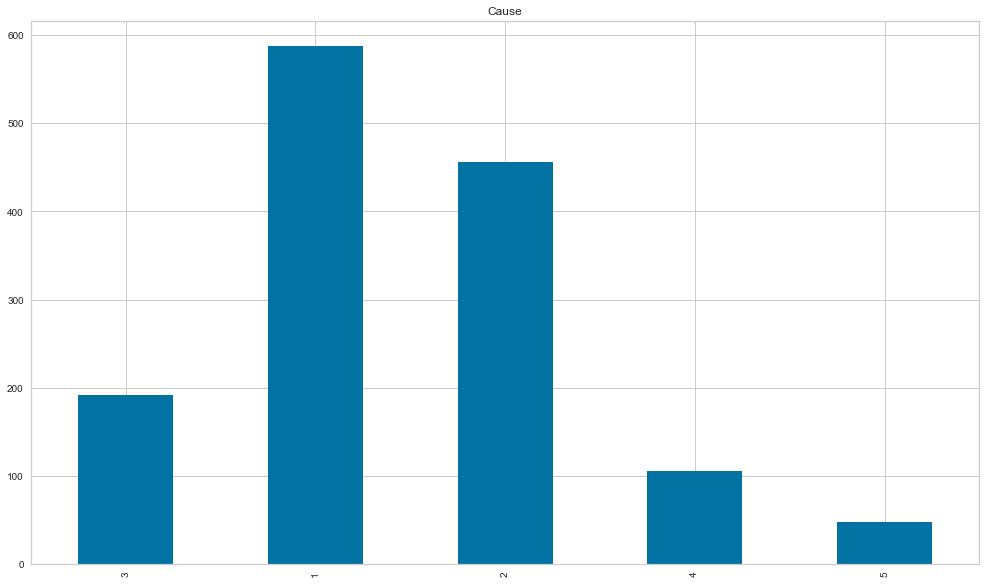

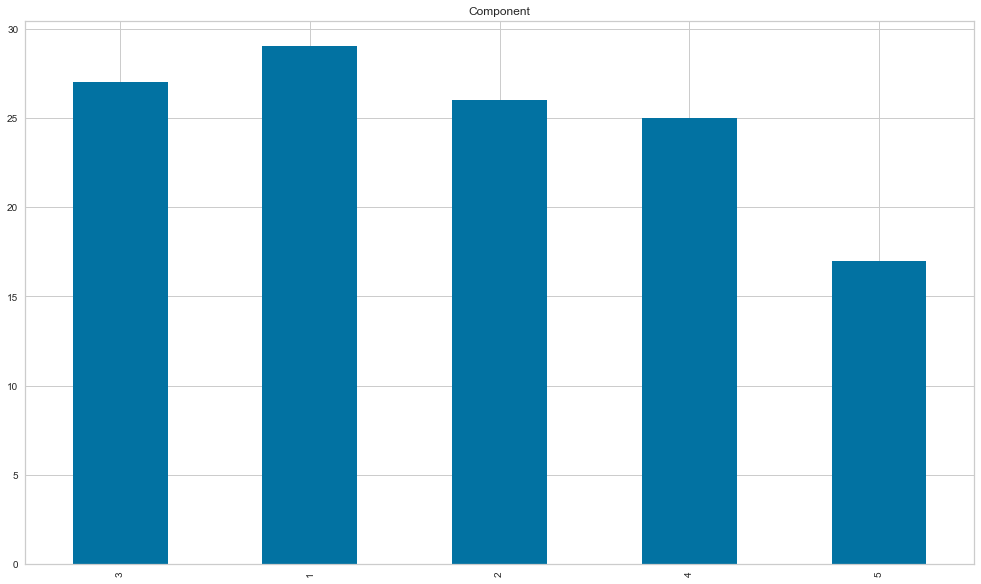

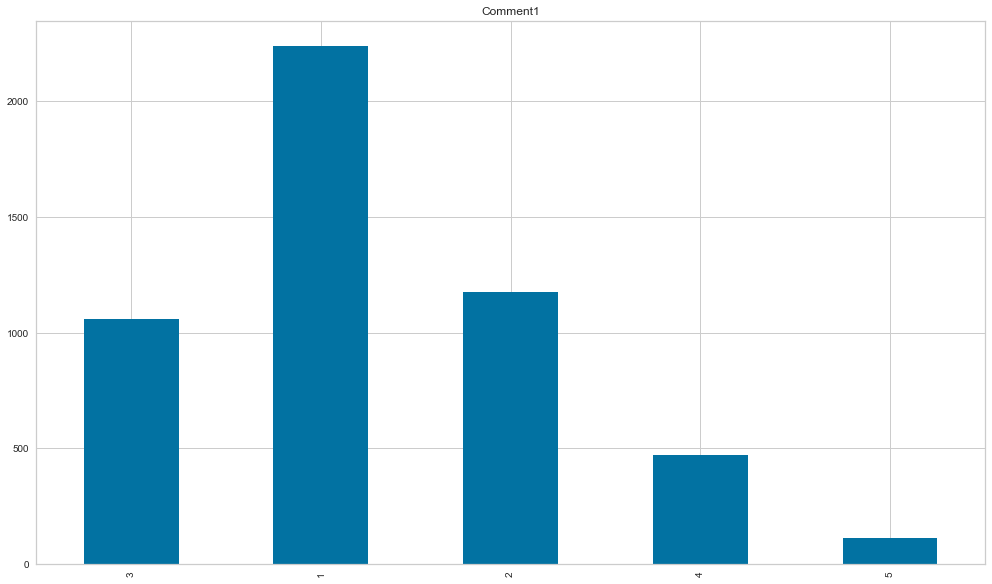

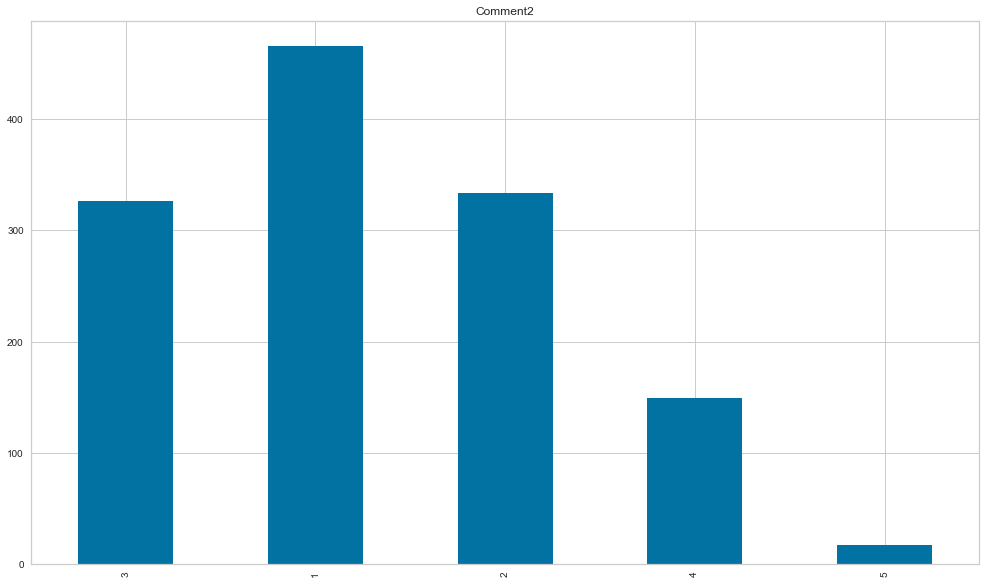

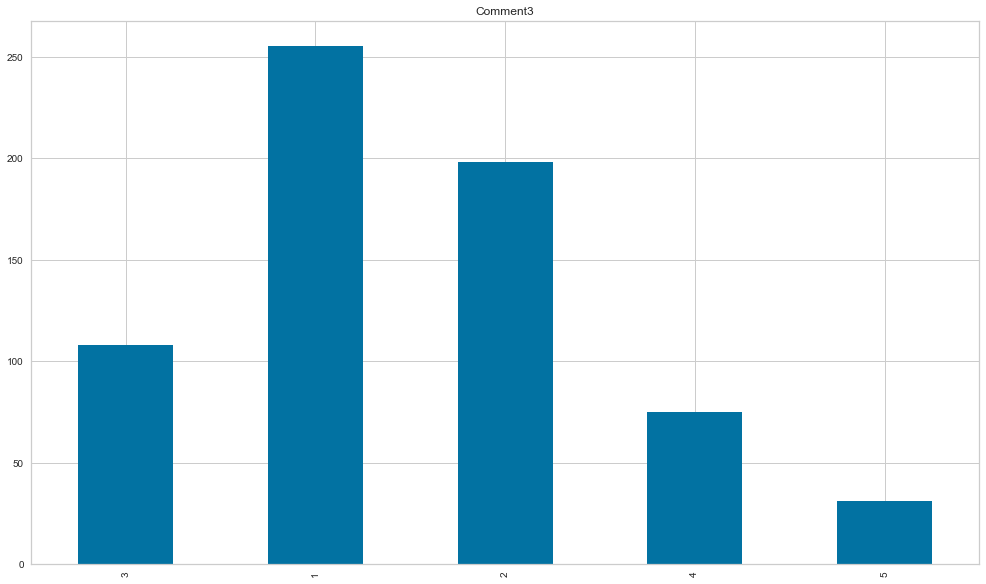

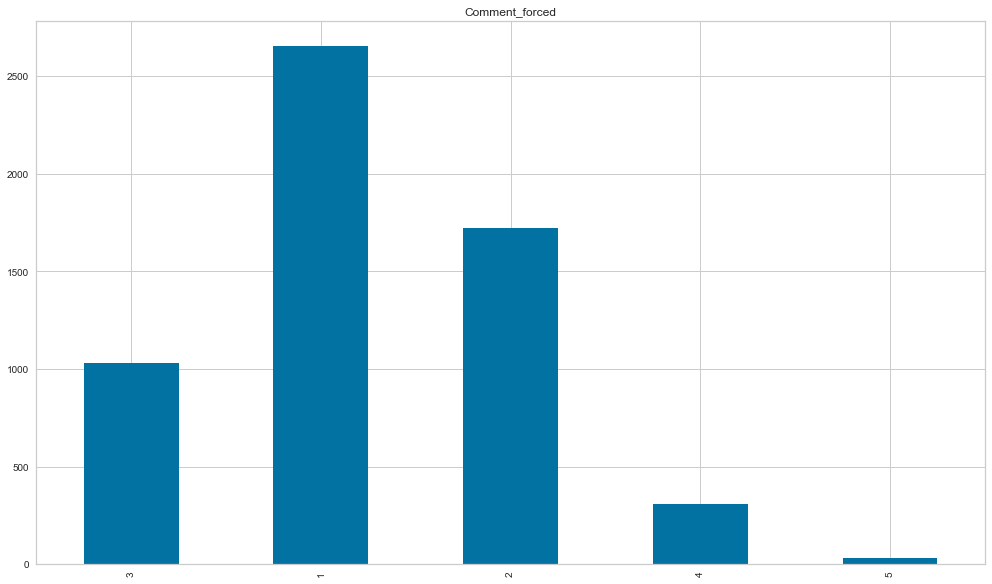

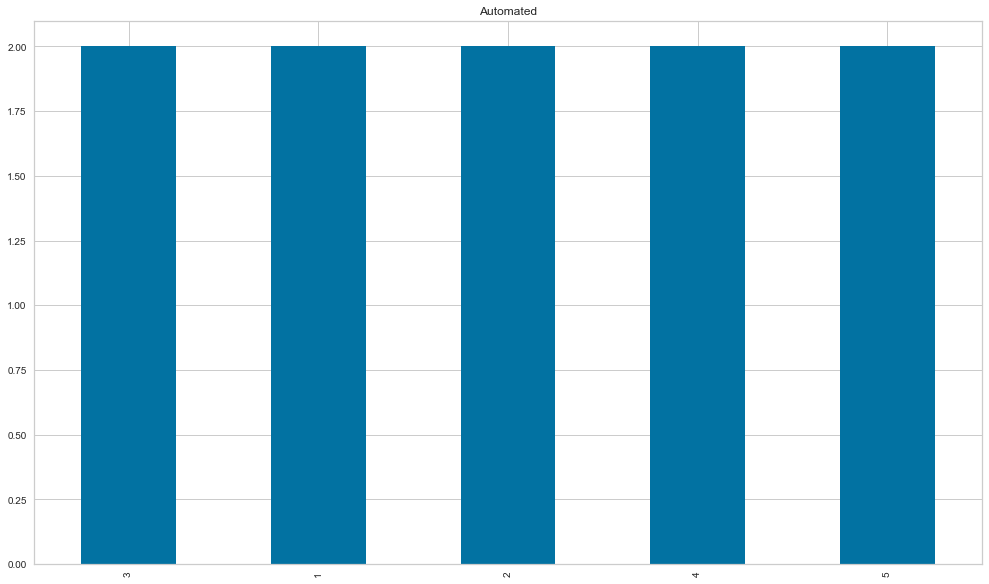

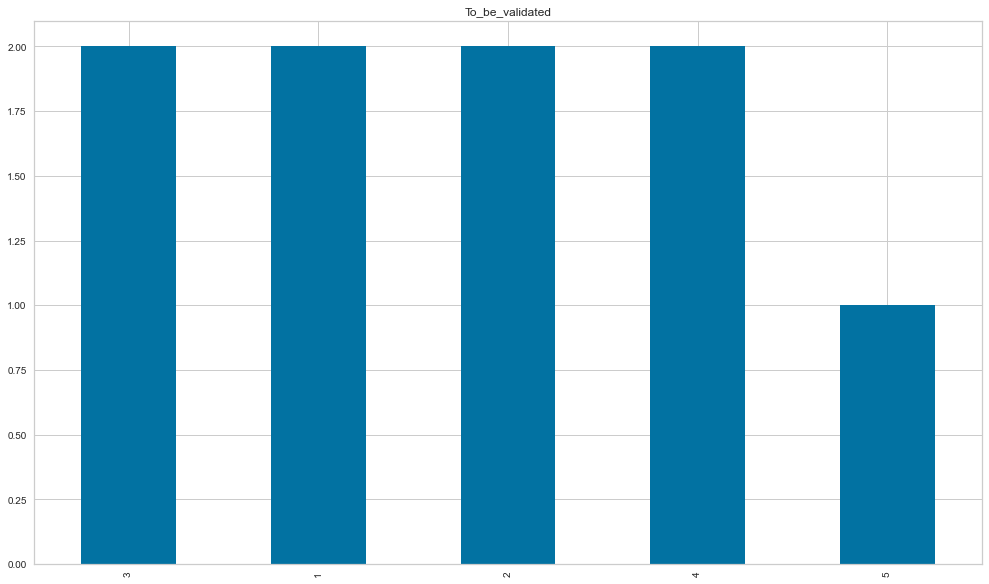

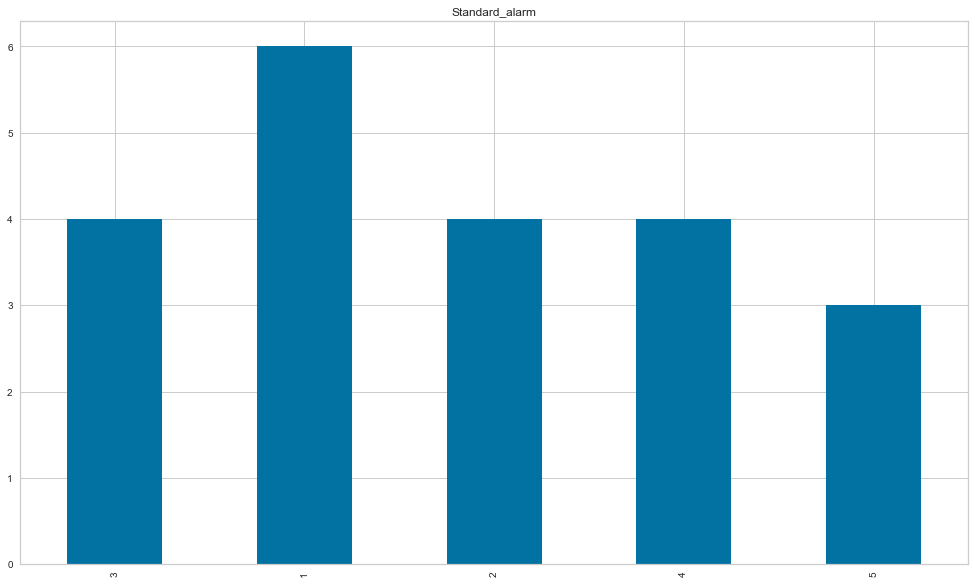

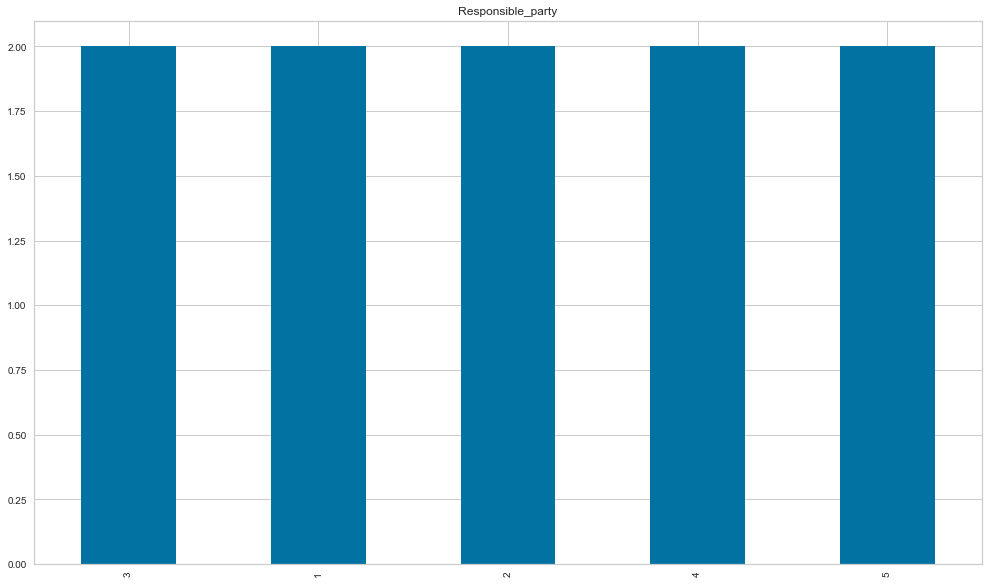

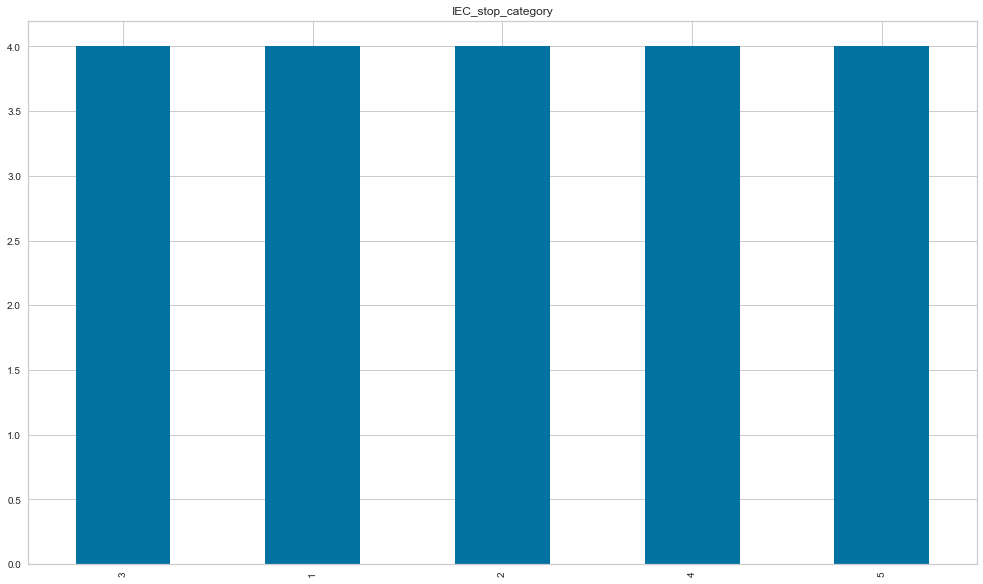

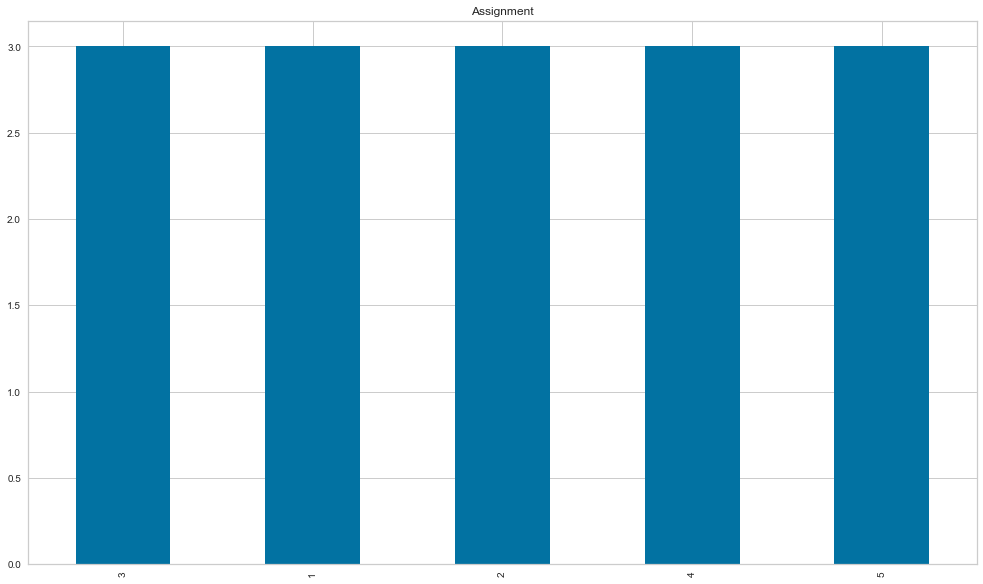

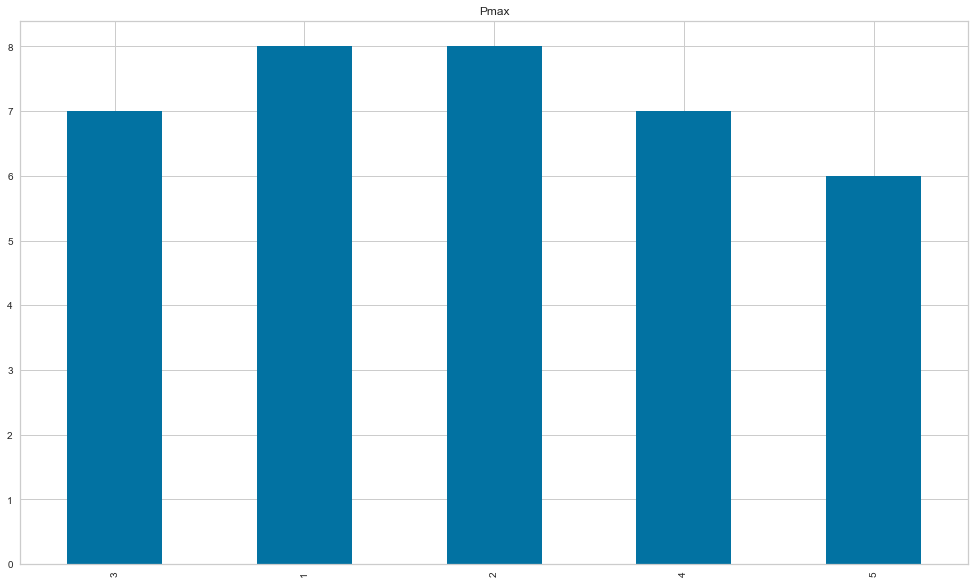

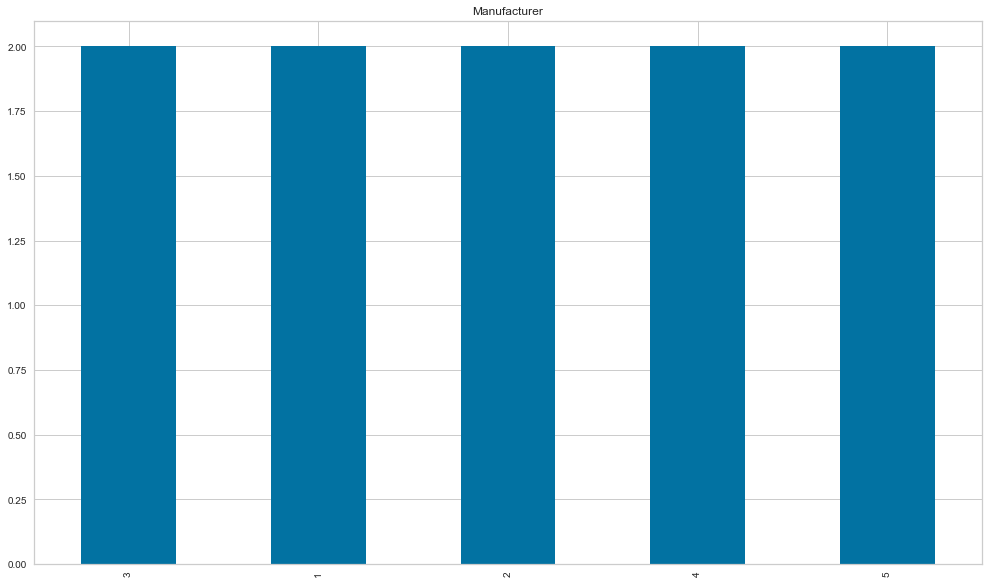

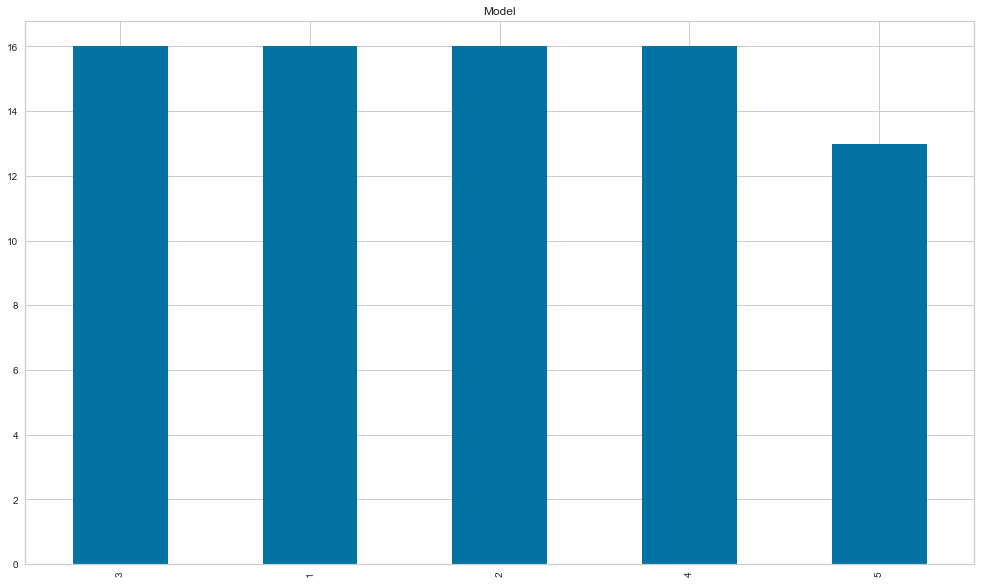

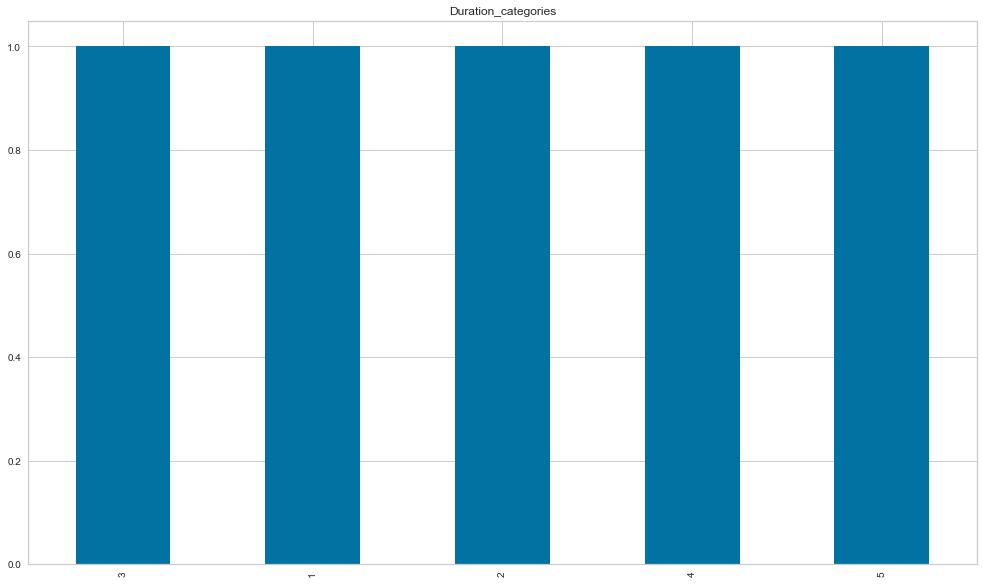

In [273]:
unique_classes = []
class_order = []
for classes in df.Duration_categories.unique():
    class_order.append(classes)
    tata = df.loc[df.Duration_categories==classes]
    unique_classes.append(tata.nunique())

unique_classes = pd.DataFrame(unique_classes)
unique_classes.index = class_order
unique_classes
for i in unique_classes.columns:
    unique_classes[i].plot.bar()
    plt.title(i)
    plt.show()

Text(0.5, 1.0, 'Duration_categories')

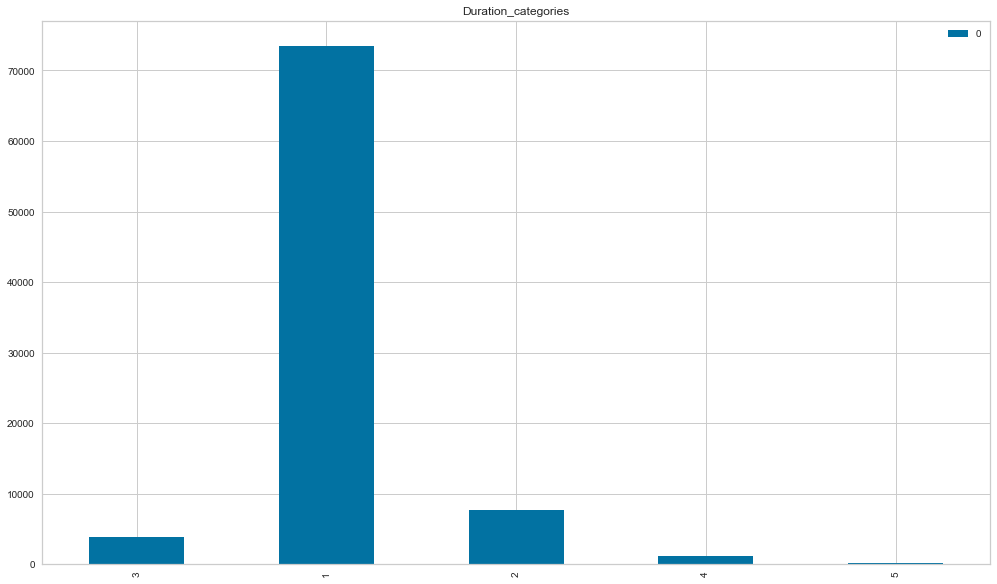

In [224]:
size_categorieS =[]
name_categorieS = []

for i in df['Duration_categories'].unique():
    size_categorieS.append(len(df.loc[df['Duration_categories']==i]))
    name_categorieS.append(i)
pd.DataFrame(size_categorieS, index=name_categorieS).plot.bar()
plt.title('Duration_categories')

### Repeat row to have greater number of categories other than 1

In [225]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def macro_averaged_mean_absolute_error(y_true, y_pred):
    all_mae = []
    for class_to_predict in np.unique(y_true):
        index_class_to_predict = np.where(y_true == class_to_predict)[0]
        mae_class = mean_absolute_error(y_true[index_class_to_predict], y_pred[index_class_to_predict])
        all_mae.append(mae_class)
    ma_mae = sum(all_mae) / len(all_mae)
    return ma_mae

Text(0.5, 1.0, 'Duration_categories')

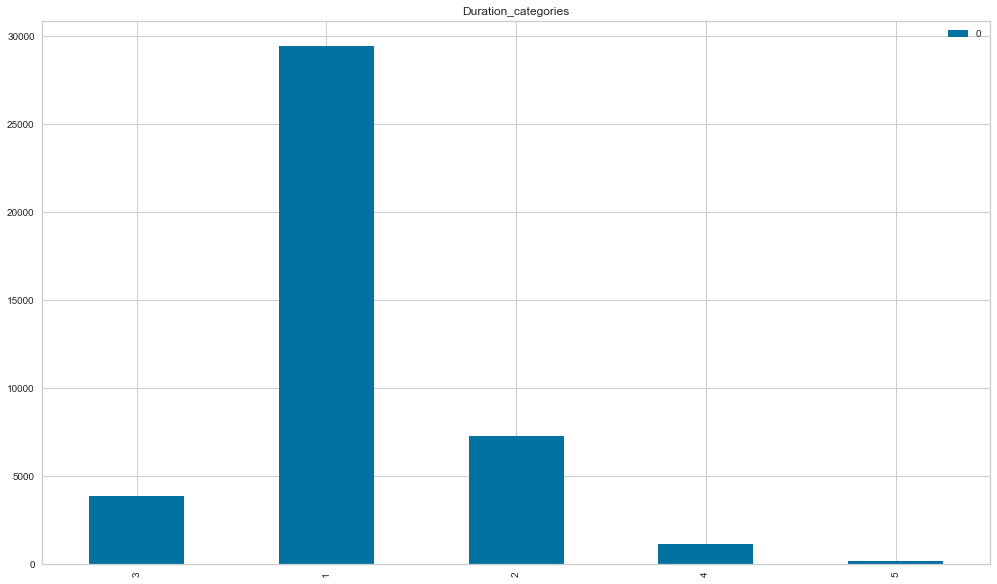

In [274]:
tata = df.reset_index().columns.tolist()
df = df.reset_index().drop_duplicates(subset=[k for k in tata if k not in ['index','Date_time_start','JDB_ID']]).set_index('index')

size_categorieS =[]
name_categorieS = []

for i in df['Duration_categories'].unique():
    size_categorieS.append(len(df.loc[df['Duration_categories']==i]))
    name_categorieS.append(i)
pd.DataFrame(size_categorieS, index=name_categorieS).plot.bar()
plt.title('Duration_categories')

In [275]:
categories_3

,JDB_ID,Duration,Date_time_start,MAC_CODE,Type,Cause,Component,Comment1,Comment2,Comment3,...,Automated,To_be_validated,Standard_alarm,Responsible_party,IEC_stop_category,Assignment,Pmax,Manufacturer,Model,Duration_categories
0,84272,526,2017-01-01 02:37:00,PARK79_E11,PANNE,NaN,NON,GearHydrWatPumpLevelLow 0m^3,NaN,NaN,...,0,NaN,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
1,84273,528,2017-01-01 02:37:41,PARK79_E11,PANNE,NaN,NON,Alm_2985 : GearHydrWatPumpLevelLow___m^3-,OK niveau cooling bas,NaN,...,1,0.0,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
15,82547,450,2017-01-01 09:06:41,PARK79_E04,PANNE,NaN,NON,Alm_2864 : ConvWaterCoolWatLevelLow_____l-,Ok Niveau cooling bas,NaN,...,1,0.0,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
17,82548,439,2017-01-01 09:17:00,PARK79_E04,PANNE,NaN,NON,ConvWaterCoolWatLevelLow 41l,NaN,NaN,...,0,NaN,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
42,84920,441,2017-01-01 22:19:53,PARK79_E13,PANNE,NaN,NON,Alm_296 : Tow. acc. X. Alarm:__.__ m/s^2-,NaN,NaN,...,1,0.0,NaN,2,1.0,20,3300,manufacturer_2,model_16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57368,21543,510,2019-06-08 09:49:46,PARK32_E01,NaN,NaN,NOW,ALM_21 : Manual stop - remote-,NaN,KBE / smoke error reset by GUA,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,3
57465,86472,502,2019-06-08 22:37:50,PARK81_E05,NaN,NaN,NOW,ALM_720 : Pitch batteries charging cycle -,NaN,NaN,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_13,3
57567,1678,792,2019-06-09 16:32:26,PARK1_E05,NaN,NaN,PWR,Alm_3222 :HighTempMSC.IGBT:Mod__- ____?C-,NaN,NaN,...,1,NaN,NaN,2,7.0,20,3450,manufacturer_2,model_2,3
57611,15079,365,2019-06-10 10:00:33,PARK19_E02,NaN,NaN,PWR,ALM_3110 : Frequency converter error-,NaN,NaN,...,1,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_3,3


Text(0.5, 1.0, 'Duration_categories')

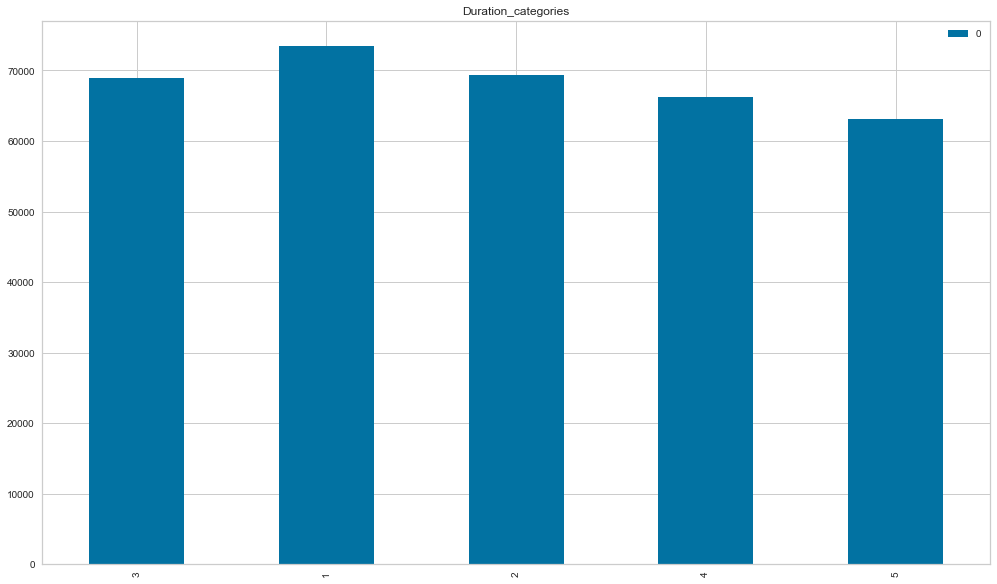

In [251]:
categories_2 =  df.loc[df['Duration_categories']==2][:round((len(df.loc[df['Duration_categories']==2])/1.5))]
categories_3 =  df.loc[df['Duration_categories']==3][:round((len(df.loc[df['Duration_categories']==3])/1.5))]
categories_4 =  df.loc[df['Duration_categories']==4][:round((len(df.loc[df['Duration_categories']==4])/2))]
categories_5 =  df.loc[df['Duration_categories']==5][:round((len(df.loc[df['Duration_categories']==5])/2))]


df_2 = df.loc[df['Duration_categories']>1]
df_2 = pd.concat([df, pd.concat([categories_2]*12), pd.concat([categories_3]*25),
           pd.concat([categories_4]*110), pd.concat([categories_5]*700)])

size_categorieS =[]
name_categorieS = []

for i in df_2['Duration_categories'].unique():
    size_categorieS.append(len(df_2 .loc[df_2['Duration_categories']==i]))
    name_categorieS.append(i)
pd.DataFrame(size_categorieS, index=name_categorieS).plot.bar()
plt.title('Duration_categories')

In [252]:
df = df_2
#from sklearn.utils import shuffle
#df = shuffle(df)

## Create Vocab Functions

In [253]:
def vocab_creation(test_1):

    df_1 = test_1
    
    ## Add fake name for missing data
    df_1 = df_1.fillna('tata')
    ## lowercase
    df_1 = df_1.str.lower()

    ## Remove punctuation
    df_1 = df_1.str.replace('?',"e")
    df_1 = df_1.str.replace('[^\w\s]','')

    ## Remove white space
    df_1 = df_1.str.strip()

    ## Simple tokenization on space
    df_1 = df_1.str.split()

    ## Count number of occurence
    vocab = Counter()
    df_1 = df_1.fillna('tata')
    df_1_text = df_1.dropna()
    for i in range(len(df_1_text)):
        vocab.update(df_1_text[i])
    
    ## remove word below < Characters
    vocab = [word for word in vocab if len(word) > 1]
    print('Vocab Size:  ', len(vocab))  
    return vocab

## Save it as txt file
def save_list(vocab, filename):
    # convert lines to a single blob of text
    data = '\n'.join(vocab)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()
    
def load_dataset_text(df, column_text_name):
    # load the dataset as a pandas DataFrame
    data = df    
    ## Fill missing values with fake name
    data = data.fillna('tata')
    ## Remove JOBIFF
    data = data[['Duration_categories', column_text_name]]
    # split into input (X) and output (y) variables
    X = data[column_text_name]
    y = data['Duration_categories']
    X = X.values
    y = y.values
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    return X, y


def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


def prepare_targets_dummy(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_Y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    return dummy_y

def Token_text(X_train, vocab):
    vocab = vocab[0].values.tolist()
    max_length = max([len(s) for s in X_train[X_train!='tata']])
    max_length = max_length 
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(vocab)
    encoded_docs = tokenizer.texts_to_sequences(X_train)
    X_train = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    #vocab_size = len(tokenizer.word_index) + 1   
    return X_train, max_length

def Token_text_text(X_test, vocab, max_length):
    vocab = vocab[0].values.tolist()
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(vocab)
    encoded_docs = tokenizer.texts_to_sequences(X_test)
    X_test = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    #vocab_size = len(tokenizer.word_index) + 1   
    return X_test



def test_duration(Y_duration):   
    data = np.array(Y_duration).reshape(len(Y_duration),1)
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    standardized = scaler.transform(data)
    return standardized



## Create Vocab

In [140]:
list_columns_text = ['Comment1', 'Comment2', 'Comment3', 'Cause', 'Comment_forced']

## Create a Vocab for Each Columns Text
for i in list_columns_text:
    #print(df[i])
    vocab = vocab_creation(df[i])
    save_list(vocab, i+'_vocab.txt')


Vocab Size:   3307
Vocab Size:   1818
Vocab Size:   850
Vocab Size:   813
Vocab Size:   1974


## Clean text data

In [254]:
def prepare_inputs_outputs_text(df, text_columns):
    X, Y = load_dataset_text(df, text_columns)
    vocab = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/'+text_columns+'_vocab.txt', header=None)
    vocab = vocab.fillna('tata')
    vocab_size = len(vocab) + 100
    X, max_length = Token_text(X, vocab)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
    y_2 = test_duration(df.Duration) 
    y_2_train, y_2_test = train_test_split(y_2, test_size=0.33, random_state=1)
    y_train_enc, y_test_enc = prepare_targets_dummy(y_train), prepare_targets_dummy(y_test)
    #y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 5))
   # y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 5))
    print('X_train.shape', X_train.shape)
    print('y_train_enc.shape', y_train_enc.shape)
    print('')
    print('vocab_size',vocab_size)
    print('max_length',max_length)
    return X_train, X_test, y_train_enc, y_test_enc, max_length, vocab_size, y_2_train, y_2_test

## Add Variables

In [255]:
def load_dataset_variables(data):
    # load the dataset as a pandas DataFrame
    #data = read_csv(filename)#, header=None)
    
    y2 = data['Duration'].values
    ## Remove JOBIFF
    data = data.drop(columns=['JDB_ID','Duration','Duration_categories',
                              'Comment1','Comment2','Comment3','Comment_forced',
                             'Cause'])
    data = data.set_index('Date_time_start')
    data.index = pd.to_datetime(data.index)
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['DayWeek'] = data.index.dayofweek
    data['Hours'] = data.index.hour
    data = data.reset_index()
    data = data.drop(columns=['Date_time_start'])
    X = data.loc[:, data.columns != 'Duration_categories']
    X_variables = X.values
    # format all fields as string
    X_variables = X_variables.astype(str)
    
    return X_variables

# prepare input data
def prepare_inputs(X_train, X_test):
    X_train_enc, X_test_enc = list(), list()
    list_convertor = []
    list_uniqueS = []
    # label encode each column
    for i in range(X_train.shape[1]):
        le = LabelEncoder()
        #le = LabelEncoderExt()
        list_unique = np.unique(X_train[:,i])
        le.fit(np.concatenate((X_train, X_test))[:, i])
        #le.fit(X_train[:, i])      
        # encode
        train_enc = le.transform(X_train[:, i])
        test_enc = le.transform(X_test[:, i])
        ## Add unknown value for hot encoder
        
        # store
        X_train_enc.append(train_enc)
        X_test_enc.append(test_enc)
        
        list_convertor.append(le)
        list_uniqueS.append(list_unique)
        
    return X_train_enc, X_test_enc, list_convertor, list_uniqueS


X_variables = load_dataset_variables(df)
X_variables_train, X_variables_test= train_test_split(X_variables, test_size=0.33, random_state=1)
# prepare input data
X_variables_train[0,:] = '<Unknown>'
X_variables_train_enc, X_variables_test_enc, transformator_input, list_uniqueS = prepare_inputs(X_variables_train, X_variables_test)

# make output 3d
#y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 5))
#y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 5))


## Mixt Two Texts

In [256]:
X_train_1, X_test_1, y_train_enc, y_test_enc, max_length, vocab_size, y_2_train, y_2_test = prepare_inputs_outputs_text(df, 'Comment1')
print('')
X_train_2, X_test_2, y_train_enc_2, y_test_enc_2, max_length_2, vocab_size_2, y_2_train, y_2_test = prepare_inputs_outputs_text(df, 'Comment2')
print('')
X_train_3, X_test_3, y_train_enc_3, y_test_enc_3, max_length_3, vocab_size_3, y_2_train, y_2_test = prepare_inputs_outputs_text(df, 'Comment3')
print('')
X_train_4, X_test_4, y_train_enc_4, y_test_enc_4, max_length_4, vocab_size_4, y_2_train, y_2_test = prepare_inputs_outputs_text(df, 'Cause')
print('')
X_train_5, X_test_5, y_train_enc_5, y_test_enc_5, max_length_5, vocab_size_5, y_5_train, y_5_test = prepare_inputs_outputs_text(df, 'Comment_forced')






/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X_train.shape (228529, 80)
y_train_enc.shape (228529, 5)

vocab_size 3407
max_length 80



/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X_train.shape (228529, 250)
y_train_enc.shape (228529, 5)

vocab_size 1918
max_length 250



/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X_train.shape (228529, 176)
y_train_enc.shape (228529, 5)

vocab_size 950
max_length 176



/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


X_train.shape (228529, 82)
y_train_enc.shape (228529, 5)

vocab_size 913
max_length 82

X_train.shape (228529, 250)
y_train_enc.shape (228529, 5)

vocab_size 2074
max_length 250


/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Add sample weights

In [258]:
## Class weights for scaled
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(df.Duration_categories.iloc[:len(y_train_enc)]),
                                                 df.Duration_categories[:len(y_train_enc)])

class_weights

array([  0.62,   0.66,   0.66,   2.73, 252.52])

In [260]:
sample_weightS = []

for i in range(len(df.Duration_categories.iloc[:len(y_train_enc)])):
    if df.Duration_categories.iloc[i]==1:
        sample_weights = class_weights[0]
        
    if df.Duration_categories.iloc[i]==2:
        sample_weights = class_weights[1]
        
    if df.Duration_categories.iloc[i]==3:
        sample_weights = class_weights[2]
        
    if df.Duration_categories.iloc[i]==4:
        sample_weights = class_weights[3]
        
    if df.Duration_categories.iloc[i]==5:
        sample_weights = class_weights[4]
    
    sample_weightS.append(sample_weights)
    
sample_weightS = np.array(sample_weightS)

In [261]:
## Define model variables

in_layers = list()
em_layers = list()
for i in range(len(X_variables_train_enc)):
    # calculate the number of unique inputs
    n_labels = len(unique(X_variables_train_enc[i])+10)
    # define input layer
    in_layer = Input(shape=(1,), name = 'Variable_'+str(i))
    # define embedding layer
    em_layer = Embedding(n_labels, 30)(in_layer)
    # store layers
    in_layers.append(in_layer)
    em_layers.append(em_layer)
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(100, activation='relu', kernel_initializer='he_normal')(merge)
dense2 = Dense(100, activation='relu', kernel_initializer='he_normal')(dense)
Flatt_variables = (Flatten())(dense2)


# define model text

## Comment1 
Comment1 = Input(shape=(None,), name="Comment1")
Emb_1 = Embedding(vocab_size, 10, input_length=max_length)(Comment1)
Conv_1 = (Conv1D(filters=32, kernel_size=8, activation='relu'))(Emb_1)
MPool_1 = (MaxPooling1D(pool_size=4))(Conv_1)
DropOut_1 = Dropout(0.2)(MPool_1)
Flatt_1 = (Flatten())(DropOut_1)

## Comment2
Comment2 = Input(shape=(None,), name="Comment2")
Emb_2 = Embedding(vocab_size_2, 10, input_length=max_length_2)(Comment2)
Conv_2 = (Conv1D(filters=32, kernel_size=8, activation='relu'))(Emb_2)
MPool_2 = (MaxPooling1D(pool_size=4))(Conv_2)
DropOut_2 = Dropout(0.2)(MPool_2)
Flatt_2 = (Flatten())(DropOut_2)

## Comment3
Comment3 = Input(shape=(None,), name="Comment3")
Emb_3 = Embedding(vocab_size_3, 10, input_length=max_length_3)(Comment3)
Conv_3 = (Conv1D(filters=32, kernel_size=8, activation='relu'))(Emb_3)
MPool_3 = (MaxPooling1D(pool_size=3))(Conv_3)
DropOut_3 = Dropout(0.2)(MPool_3)
Flatt_3 = (Flatten())(DropOut_3)

## Cause
Cause = Input(shape=(None,), name="Cause")
Emb_4 = Embedding(vocab_size_4, 10, input_length=max_length_4)(Cause)
Conv_4 = (Conv1D(filters=32, kernel_size=8, activation='relu'))(Emb_4)
MPool_4 = (MaxPooling1D(pool_size=4))(Conv_4)
DropOut_4 = Dropout(0.2)(MPool_4)
Flatt_4 = (Flatten())(DropOut_4)

## Comment Forced
Comment_Forced = Input(shape=(None,), name="Comment_Forced")
Emb_5 = Embedding(vocab_size_5, 10, input_length=max_length_5)(Comment_Forced)
Conv_5 = (Conv1D(filters=32, kernel_size=8, activation='relu'))(Emb_5)
MPool_5 = (MaxPooling1D(pool_size=5))(Conv_5)
DropOut_5 = Dropout(0.2)(MPool_5)
Flatt_5 = (Flatten())(DropOut_5)


Concantenate = concatenate([Flatt_1, Flatt_2 ,Flatt_3, Flatt_4, Flatt_5, Flatt_variables])
Dense_1 = (Dense(100, activation='relu'))(Concantenate)
DropOut_5 = Dropout(0.2)(Dense_1)
Dense_2 = (Dense(5, activation='softmax', name="Soft_Pred"))(Dense_1)
DropOut_6 = Dropout(0.2)(Dense_2)
Dense_3 = (Dense(1, activation='relu', name="Duration"))(Dense_1)



## Model


inputs_text = [Comment1, Comment2, Comment3, Cause, Comment_Forced]

for inputs in inputs_text:
    in_layers.append(inputs)

model = Model(
    inputs=in_layers,
    outputs=[Dense_2, Dense_3])

print(model.summary())
plot_model(model, to_file='model_plot_text.png', show_shapes=True, show_layer_names=True)

# compile network
model.compile(loss=['categorical_crossentropy','MSE'], optimizer='adam', metrics=['accuracy'])



model_history = model.fit(
    {"Variable_0": X_variables_train_enc[0],
     "Variable_1": X_variables_train_enc[1],
     "Variable_2": X_variables_train_enc[2],
     "Variable_3": X_variables_train_enc[3],
     "Variable_4": X_variables_train_enc[4],
     "Variable_5": X_variables_train_enc[5],
     "Variable_6": X_variables_train_enc[6],
     "Variable_7": X_variables_train_enc[7],
     "Variable_8": X_variables_train_enc[8],
     "Variable_9": X_variables_train_enc[9],
     "Variable_10": X_variables_train_enc[10],
     "Variable_11": X_variables_train_enc[11],
     "Variable_12": X_variables_train_enc[12],
     "Variable_13": X_variables_train_enc[13],
     "Variable_14": X_variables_train_enc[14],
     "Variable_15": X_variables_train_enc[15],
     "Variable_16": X_variables_train_enc[16],
     "Comment1": X_train_1, 
     "Comment2": X_train_2, 
     "Comment3": X_train_3, 
     "Cause": X_train_4,
     "Comment_Forced": X_train_5},
    {"Soft_Pred": y_train_enc,
     "Duration": y_2_train},
    epochs=30,
    batch_size=512,
    sample_weight = [sample_weightS, sample_weightS],
    validation_data=(
    {"Variable_0": X_variables_test_enc[0],
     "Variable_1": X_variables_test_enc[1],
     "Variable_2": X_variables_test_enc[2],
     "Variable_3": X_variables_test_enc[3],
     "Variable_4": X_variables_test_enc[4],
     "Variable_5": X_variables_test_enc[5],
     "Variable_6": X_variables_test_enc[6],
     "Variable_7": X_variables_test_enc[7],
     "Variable_8": X_variables_test_enc[8],
     "Variable_9": X_variables_test_enc[9],
     "Variable_10": X_variables_test_enc[10],
     "Variable_11": X_variables_test_enc[11],
     "Variable_12": X_variables_test_enc[12],
     "Variable_13": X_variables_test_enc[13],
     "Variable_14": X_variables_test_enc[14],
     "Variable_15": X_variables_test_enc[15],
     "Variable_16": X_variables_test_enc[16],
     "Comment1": X_test_1, 
     "Comment2": X_test_2, 
     "Comment3": X_test_3, 
     "Cause": X_test_4,
     "Comment_Forced": X_test_5},
    {"Soft_Pred": y_test_enc,
     "Duration": y_2_test}))


Model: "model_16"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Comment1 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
Comment2 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
Comment3 (InputLayer)           (None, None)         0                                            
__________________________________________________________________________________________________
Cause (InputLayer)              (None, None)         0                                            
___________________________________________________________________________________________

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 228529 samples, validate on 112560 samples
Epoch 1/30
228529/228529 [==============================] - 99s 432us/step - loss: 1.7790 - Soft_Pred_loss: 0.9253 - Duration_loss: 0.8531 - Soft_Pred_accuracy: 0.6114 - Duration_accuracy: 0.0000e+00 - val_loss: 1.6847 - val_Soft_Pred_loss: 0.6635 - val_Duration_loss: 1.0216 - val_Soft_Pred_accuracy: 0.7138 - val_Duration_accuracy: 0.0000e+00
Epoch 2/30
228529/228529 [==============================] - 99s 432us/step - loss: 1.3898 - Soft_Pred_loss: 0.5366 - Duration_loss: 0.8532 - Soft_Pred_accuracy: 0.7738 - Duration_accuracy: 0.0000e+00 - val_loss: 1.5089 - val_Soft_Pred_loss: 0.4877 - val_Duration_loss: 1.0216 - val_Soft_Pred_accuracy: 0.8143 - val_Duration_accuracy: 0.0000e+00
Epoch 3/30
228529/228529 [==============================] - 96s 420us/step - loss: 1.2543 - Soft_Pred_loss: 0.4011 - Duration_loss: 0.8574 - Soft_Pred_accuracy: 0.8265 - Duration_accuracy: 0.0000e+00 - val_loss: 1.4770 - val_Soft_Pred_loss: 0.4558 - val_Dura

228529/228529 [==============================] - 109s 479us/step - loss: 0.9016 - Soft_Pred_loss: 0.0485 - Duration_loss: 0.8523 - Soft_Pred_accuracy: 0.9788 - Duration_accuracy: 0.0000e+00 - val_loss: 1.1456 - val_Soft_Pred_loss: 0.1245 - val_Duration_loss: 1.0216 - val_Soft_Pred_accuracy: 0.9695 - val_Duration_accuracy: 0.0000e+00
Epoch 25/30
228529/228529 [==============================] - 97s 426us/step - loss: 0.8952 - Soft_Pred_loss: 0.0422 - Duration_loss: 0.8529 - Soft_Pred_accuracy: 0.9814 - Duration_accuracy: 0.0000e+00 - val_loss: 1.1397 - val_Soft_Pred_loss: 0.1186 - val_Duration_loss: 1.0216 - val_Soft_Pred_accuracy: 0.9722 - val_Duration_accuracy: 0.0000e+00
Epoch 26/30
228529/228529 [==============================] - 97s 425us/step - loss: 0.8934 - Soft_Pred_loss: 0.0403 - Duration_loss: 0.8519 - Soft_Pred_accuracy: 0.9820 - Duration_accuracy: 0.0000e+00 - val_loss: 1.1432 - val_Soft_Pred_loss: 0.1221 - val_Duration_loss: 1.0216 - val_Soft_Pred_accuracy: 0.9711 - val_Dur

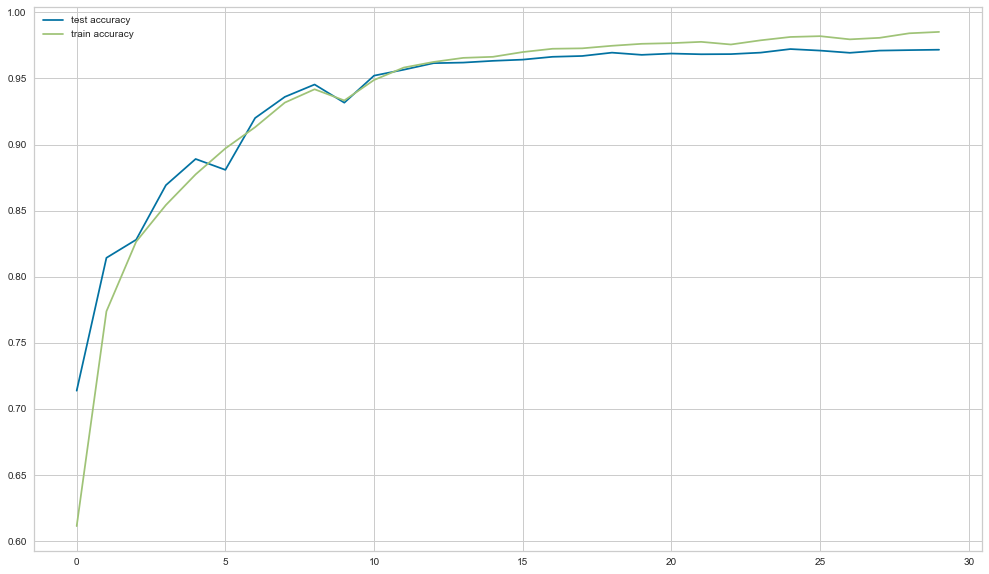

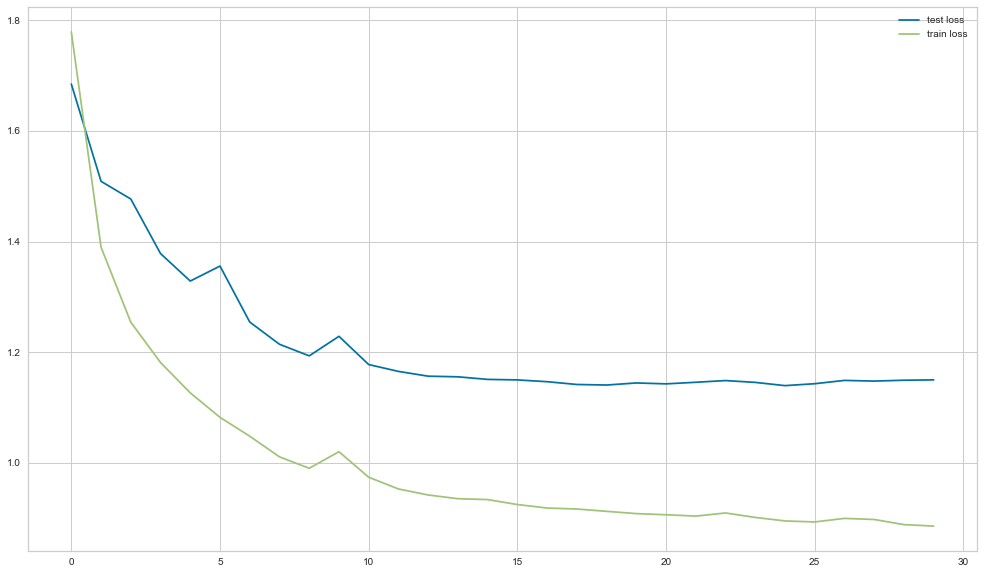

In [262]:
df_his =  pd.DataFrame.from_dict(model_history.history)
plt.plot(df_his.iloc[:,3], label='test accuracy')
plt.plot(df_his.iloc[:,8], label='train accuracy')
plt.legend()
plt.show()

plt.plot(df_his['val_loss'], label='test loss')
plt.plot(df_his['loss'], label='train loss')
plt.legend()
plt.show()

Normalized confusion matrix
[[9.16e-01 6.04e-02 1.92e-02 3.46e-03 7.41e-04]
 [2.36e-02 9.72e-01 3.91e-03 5.27e-04 8.78e-05]
 [9.77e-03 2.94e-03 9.87e-01 4.38e-04 4.38e-05]
 [4.49e-03 2.20e-03 1.01e-03 9.92e-01 9.16e-05]
 [7.68e-04 4.80e-04 2.40e-04 1.92e-04 9.98e-01]]


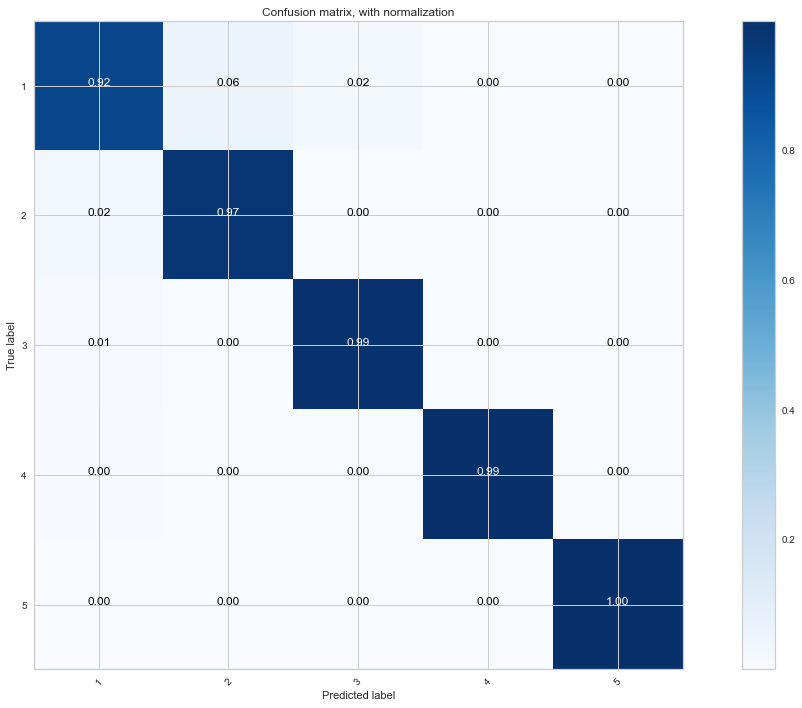

In [263]:
prediction = model.predict([X_variables_test_enc[0],
                           X_variables_test_enc[1],
                           X_variables_test_enc[2],
                           X_variables_test_enc[3],
                           X_variables_test_enc[4],
                           X_variables_test_enc[5],
                           X_variables_test_enc[6],
                           X_variables_test_enc[7],
                           X_variables_test_enc[8],
                           X_variables_test_enc[9],
                           X_variables_test_enc[10],
                           X_variables_test_enc[11],
                           X_variables_test_enc[12],
                           X_variables_test_enc[13],
                           X_variables_test_enc[14],
                           X_variables_test_enc[15],
                           X_variables_test_enc[16],
                           X_test_1, X_test_2, X_test_3, X_test_4, X_test_5])[0]

real = []
from numpy import argmax
predict = []
for i in range(len(prediction)):
    #print('Categories:  ', str(argmax([prediction[i]])+1),  ' | Softmax:   ' , str(prediction[i].max()))
    predict.append(int(argmax([prediction[i]])+1))
    real.append(int(argmax([y_test_enc[i]])+1))


from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    

cnf_matrix = confusion_matrix(real,predict, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, with normalization')

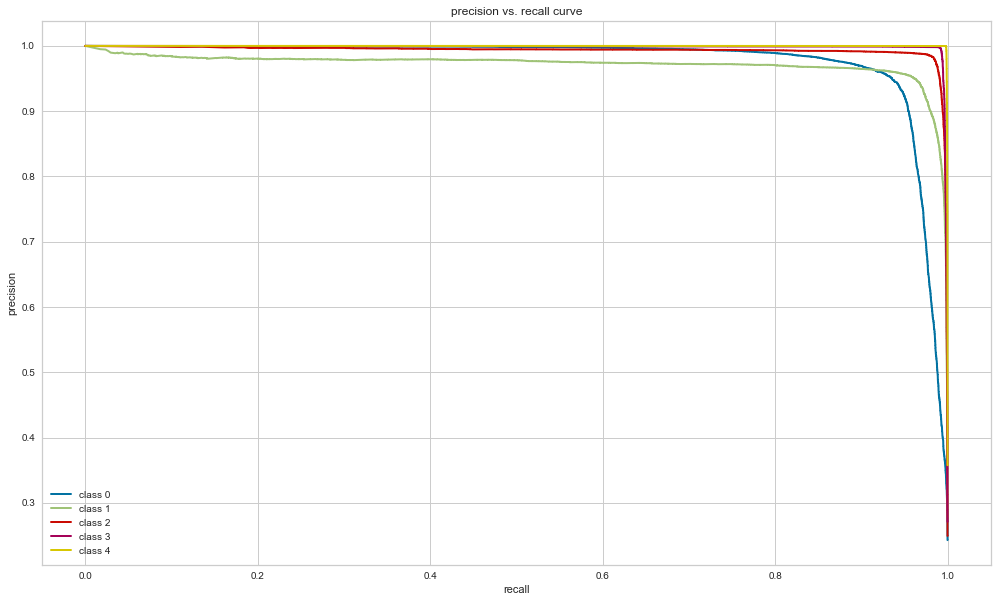

In [264]:
# precision recall curve
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn import preprocessing


y_real = preprocessing.label_binarize(real, classes=[1, 2, 3, 4, 5])
y_predicted = preprocessing.label_binarize(predict, classes=[1, 2, 3, 4, 5])


precision = dict()
recall = dict()
for i in range(len(np.unique(real))):
    precision[i], recall[i], _ = precision_recall_curve(y_real[:, i],
                                                        prediction[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

## Test

In [265]:
test_data = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
test_sample = pd.DataFrame(test_data['JDB_ID'])
test_sample['Duration_categories'] = pd.DataFrame(predict)
test_sample = test_sample.set_index('JDB_ID')
test_sample

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Duration_categories
JDB_ID,
117423,2
56457,4
113830,1
111628,5
86596,5
...,...
33365,3
33366,2
33367,3


In [266]:
X_test_set = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
X_test_set

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,JDB_ID,Date_time_start,MAC_CODE,Type,Cause,Component,Comment1,Comment2,Comment3,Comment_forced,Automated,To_be_validated,Standard_alarm,Responsible_party,IEC_stop_category,Assignment,Pmax,Manufacturer,Model
0,117423,2020-01-01 00:55:00,PARK99_E01,NaN,NaN,TWR,ALM_4588 : Oscillation encoder tower,NaN,NaN,NaN,0,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_13
1,56457,2020-01-01 01:14:00,PARK62_E01,NaN,NaN,PWR,ALM_3210 : Frequency converter load rejection,NaN,NaN,NaN,0,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_13
2,113830,2020-01-01 02:02:05,PARK95_E05,NaN,NaN,MVC,ALM_6200 : Cable autounwind,NaN,NaN,NaN,1,NaN,NaN,2,2.0,19,2050,manufacturer_1,model_3
3,111628,2020-01-01 02:17:00,PARK94_E04,NaN,NaN,TWR,ALM_4588 : Oscillation encoder tower,NaN,NaN,NaN,0,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_13
4,86596,2020-01-01 03:06:00,PARK81_E05,NaN,NaN,BRK,ALM_455 : Repeating error BP52,NaN,NaN,NaN,0,NaN,NaN,2,7.0,20,2050,manufacturer_1,model_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47243,33365,2020-11-06 21:07:33,PARK49_E03,NaN,NaN,SEC,Alm_176 : Error on all wind sensors-,NaN,NaN,NaN,1,NaN,NaN,2,7.0,20,2000,manufacturer_2,model_7
47244,33366,2020-11-06 21:35:57,PARK49_E03,NaN,NaN,SEC,Alm_176 : Error on all wind sensors-,NaN,NaN,NaN,1,NaN,NaN,2,7.0,20,2000,manufacturer_2,model_7
47245,33367,2020-11-06 22:04:20,PARK49_E03,NaN,NaN,SEC,Alm_176 : Error on all wind sensors-,NaN,NaN,NaN,1,NaN,NaN,2,7.0,20,2000,manufacturer_2,model_7
47246,33368,2020-11-06 22:31:54,PARK49_E03,NaN,NaN,SEC,Alm_176 : Error on all wind sensors-,NaN,NaN,NaN,1,NaN,NaN,2,7.0,20,2000,manufacturer_2,model_7


In [267]:
def prepare_inputs_test_set(df, text_columns, max_length):
    X_test_set = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
    X_test_set = X_test_set[text_columns]
    X_test_set = X_test_set.values
    X_test_set = X_test_set.astype(str)
    vocab = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/'+text_columns+'_vocab.txt', header=None)
    vocab = vocab.fillna('tata')
    X_test_set = Token_text_text(X_test_set, vocab, max_length)
    return X_test_set

In [268]:
X_test_set = prepare_inputs_test_set(df, 'Comment1', max_length)
X_test_set_2 = prepare_inputs_test_set(df, 'Comment2', max_length_2)
X_test_set_3 = prepare_inputs_test_set(df, 'Comment3', max_length_3)
X_test_set_4 = prepare_inputs_test_set(df, 'Cause', max_length_4)
X_test_set_5 = prepare_inputs_test_set(df, 'Comment_forced', max_length_5)






/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3242: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [269]:
# load the dataset
def data_test(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)#, header=None)
    ## Remove JOBIFF
    data = data.drop(columns=['JDB_ID',
                              'Comment1','Comment2','Comment3','Comment_forced',
                             'Cause'])
    data = data.set_index('Date_time_start')
    data.index = pd.to_datetime(data.index)
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['DayWeek'] = data.index.dayofweek
    data['Hours'] = data.index.hour
    data = data.reset_index()
    data = data.drop(columns=['Date_time_start'])
    data = data.values
    data = data.astype(str)
    return  data

# prepare input data
def prepare_inputs_test(X_train, transformator, list_uniqueS):
    X_train_enc = list()
    # label encode each column
    for i in range(X_train.shape[1]):
        #le = LabelEncoder()
        test = X_train[:,i]
        le = transformator_input[i]
        tata = []
        for row in range(len(test)):
            if test[row] in list_uniqueS[i]:
                next
            else:
                test[row] = '<Unknown>'
                
        # encode
        #train_enc = le.transform(test)
        #le.fit(X_train[:, i])
        # encode
        train_enc = transformator[i].transform(test)
        # store
        X_train_enc.append(train_enc)
    return X_train_enc



# load the dataset
X_test = data_test('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')

print('X_test shape:', X_test.shape)

# prepare input data
X_enc_test = prepare_inputs_test(X_test, transformator_input, list_uniqueS)



X_test shape: (47248, 17)


In [270]:
prediction = model.predict([X_enc_test[0],
                            X_enc_test[1],
                            X_enc_test[2],
                            X_enc_test[3],
                            X_enc_test[4],
                            X_enc_test[5],
                            X_enc_test[6],
                            X_enc_test[7],
                            X_enc_test[8],
                            X_enc_test[9],
                            X_enc_test[10],
                            X_enc_test[11],
                            X_enc_test[12],
                            X_enc_test[13],
                            X_enc_test[14],
                            X_enc_test[15],
                            X_enc_test[16],
                            X_test_set, X_test_set_2, 
                            X_test_set_3, X_test_set_4, X_test_set_5])[0]

from numpy import argmax
predict = []
for i in range(len(X_test_set)):
    #print('Categories:  ', str(argmax([prediction[i]])+1),  ' | Softmax:   ' , str(prediction[i].max()))
    predict.append(int(argmax([prediction[i]])+1))
    
pd.DataFrame(predict)#.plot()

,0
0,1
1,1
2,1
3,1
4,1
...,...
47243,1
47244,1
47245,1
47246,1


In [271]:
test_data = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
test_sample = pd.DataFrame(test_data['JDB_ID'])
test_sample['Duration_categories'] = pd.DataFrame(predict)
test_sample = test_sample.set_index('JDB_ID')
test_sample

/Users/gz6009/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Duration_categories
JDB_ID,
117423,1
56457,1
113830,1
111628,1
86596,1
...,...
33365,1
33366,1
33367,1


In [272]:
test_sample.to_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/submission_21.csv')

## Test emmebding
### Create a Vocab

###  Create Emmbeding

In [ ]:
def load_dataset_other(filename):
    # load the dataset as a pandas DataFrame
    data = pd.read_csv(filename)#, header=None)
    
    y2 = data['Duration'].values
    ## Remove JOBIFF
    data = data.drop(columns=['JDB_ID','Duration',
                              'Comment1','Comment2','Comment3','Comment_forced',
                             'Cause'])
    data = data.set_index('Date_time_start')
    data.index = pd.to_datetime(data.index)
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['DayWeek'] = data.index.dayofweek
    data['Hours'] = data.index.hour
    data = data.reset_index()
    data = data.drop(columns=['Date_time_start'])
    # split into input (X) and output (y) variables
    X = data.loc[:, data.columns != 'Duration_categories']
    y = data['Duration_categories']
    X = X.values
    y = y.values
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    y2 = y2.reshape((len(y2),1,1))
    return X, y, y2


def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def prepare_targets_2(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_Y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    return dummy_y

In [ ]:
df['Cause']
cause = cause.fillna('tata')

 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(cause.values)
encoded_docs = tokenizer.texts_to_sequences(cause.values)
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
vocab_size = len(tokenizer.word_index) + 1

## Get Y and Split
X_no_need, y, y2_no_need = load_dataset_other('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/train_logs.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
y_train_enc, y_test_enc = prepare_targets_2(y_train), prepare_targets_2(y_test)

y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 5))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 5))
max_length = max([len(s) for s in cause[cause!='tata']])

In [ ]:
X_train

In [ ]:
max([len(s) for s in cause[cause!='tata']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
pd.DataFrame(X_train).iloc[:,1:].sum(axis=1).plot()

In [ ]:
pd.DataFrame(X).iloc[:,1:].sum(axis=1).plot()

In [ ]:
max_length = max([len(s) for s in cause[cause!='tata']])
max_length

In [ ]:
#from keras.preprocessing.text import Tokenizer
#cause = cause.fillna('tata')

 
# create the tokenizer
#tokenizer = Tokenizer()
# fit the tokenizer on the documents
#tokenizer.fit_on_texts(cause.values)

#max_length = max([len(s) for s in cause[cause!='tata']])

#encoded_docs = tokenizer.texts_to_sequences(cause.values)
# pad sequences
#Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
#ytrain = y_train_enc[:,0,:]
#Xtrain = Xtrain[: len(ytest)]
# define vocabulary size (largest integer value)

 


In [ ]:
print(X_train.shape)
print(y_train_enc.shape)

### NN

In [ ]:
X_train.shape

In [ ]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length))
model.add(Conv1D(filters=64, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(MaxPooling1D(pool_size=4))
#model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X_train, y_train_enc, epochs=100, verbose=2)
# evaluate

In [ ]:
prediction = model.predict(X_test)

from numpy import argmax
predict = []
for i in range(len(prediction)):
    #print('Categories:  ', str(argmax([prediction[i]])+1),  ' | Softmax:   ' , str(prediction[i].max()))
    predict.append(int(argmax([prediction[i]])+1))

In [ ]:
print(pd.DataFrame(predict)[0].value_counts())
print(pd.DataFrame(y_test)[0].value_counts())

In [ ]:
pd.DataFrame(predict).plot()
#pd.DataFrame(y_test).plot()

In [ ]:
y_test

In [ ]:
test_1 = df[['Comment1', 'Comment2', 'Comment3', 'Cause', 'Duration_categories']]
for j in range(len(test_1.columns) -1):
    test = test_1[[test_1.columns[j], 'Duration_categories']]
    print("################################################")
    print("#########",          [test_1.columns[j]],           "######")
    print("################################################")
    for i in range(1,6):
                print('Duration: ' + str(i))
                #print('   Number of Case:', len(test.loc[test['Duration_categories']==i]))
                print('      Represents: ', len(test.loc[test['Duration_categories']==i])/len(test)*100)
                #print('   Number of Case:', len(test.loc[test['Duration_categories']==i].dropna()))
                print('      Represents: ', len(test.loc[test['Duration_categories']==i].dropna())/len(test.dropna())*100)

In [ ]:
df['Comment1'].dropna()

In [ ]:
i

In [ ]:
test_data


cause_test = test_data['Cause']

## lowercase
cause_test = cause.str.lower()
cause_test.unique()

## Remove punctuation
cause_test = cause_test.str.replace('?',"e")
cause_test = cause_test.str.replace('[^\w\s]','')

## Remove white space
cause_test = cause_test.str.strip()

## Simple tokenization on space

cause_test = cause_test.str.split()

cause_test = cause_test.fillna('tata')

tokenizer.fit_on_texts(cause_test.values)


Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')



In [ ]:
model.predict(Xtest)

In [ ]:
prediction = model.predict(Xtest)

In [ ]:
from numpy import argmax
predict = []
for i in range(len(prediction)):
    #print('Categories:  ', str(argmax([prediction[i]])+1),  ' | Softmax:   ' , str(prediction[i].max()))
    predict.append(int(argmax([prediction[i]])+1))

In [ ]:
ytrain = y_train_enc[:,0,:]

In [ ]:
ytrain

## Darwin Data

In [ ]:
# example of learned embedding encoding for a neural network
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.merge import concatenate
from keras.utils import plot_model
import pandas
import bisect
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)#, header=None)
    
    y2 = data['Duration'].values
    ## Remove JOBIFF
    data = data.drop(columns=['JDB_ID','Duration',
                              'Comment1','Comment2','Comment3','Comment_forced',
                             'Cause'])
    data = data.set_index('Date_time_start')
    data.index = pd.to_datetime(data.index)
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['DayWeek'] = data.index.dayofweek
    data['Hours'] = data.index.hour
    data = data.reset_index()
    data = data.drop(columns=['Date_time_start'])
    # split into input (X) and output (y) variables
    X = data.loc[:, data.columns != 'Duration_categories']
    y = data['Duration_categories']
    X = X.values
    y = y.values
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    y2 = y2.reshape((len(y2),1,1))
    return X, y, y2
 
# prepare input data
def prepare_inputs(X_train, X_test):
    X_train_enc, X_test_enc = list(), list()
    list_convertor = []
    list_uniqueS = []
    # label encode each column
    for i in range(X_train.shape[1]):
        le = LabelEncoder()
        #le = LabelEncoderExt()
        list_unique = np.unique(X_train[:,i])
        le.fit(X_train[:, i])
        
        
        # encode
        train_enc = le.transform(X_train[:, i])
        test_enc = le.transform(X_test[:, i])
        ## Add unknown value for hot encoder
        
        # store
        X_train_enc.append(train_enc)
        X_test_enc.append(test_enc)
        
        list_convertor.append(le)
        list_uniqueS.append(list_unique)
        
    return X_train_enc, X_test_enc, list_convertor, list_uniqueS
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def prepare_targets_2(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_Y = encoder.transform(y)
    # convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    return dummy_y

 
# load the dataset
X, y, y2 = load_dataset('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/train_logs.csv')
print('X shape:', X.shape)
print('y shape:', y.shape)
print('y2 shape:', y2.shape)
X[0,:] = '<Unknown>'

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
y2_train = y2[:y_train.shape[0]]
y2_test = y2[y_train.shape[0]:]
print('y_train shape:', y_train.shape)
# prepare input data


X_train_enc, X_test_enc, transformator_input, list_uniqueS = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets_2(y_train), prepare_targets_2(y_test)
# make output 3d
print('y_train_enc shape:', y_train_enc.shape)
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 5))
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 5))
# prepare each input head
print('y_train_enc shape:', y_train_enc.shape)


In [ ]:
X_train_enc[2]

In [ ]:
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
    # calculate the number of unique inputs
    n_labels = len(unique(X_train_enc[i])+10)
    print(n_labels)
    # define input layer
    in_layer = Input(shape=(1,))
    # define embedding layer
    em_layer = Embedding(n_labels, 50)(in_layer)
    # store layers
    in_layers.append(in_layer)
    em_layers.append(em_layer)
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(100, activation='relu', kernel_initializer='he_normal')(merge)
dense2 = Dense(100, activation='relu', kernel_initializer='he_normal')(dense)
output1 = Dense(5, activation='softmax')(dense2)
output2 = Dense(1, activation='relu')(dense2)

#model = Model(inputs=in_layers, outputs=[output1,output2])
model = Model(inputs=in_layers, outputs=output1)
#model = Model(inputs=in_layers, outputs=output2)
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# plot graph
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
print(model.summary())
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, validation_data=(X_test_enc, y_test_enc), epochs=1000, batch_size=512, verbose=2)
#model.fit(X_train_enc, [y_train_enc,y2_train], epochs=100, batch_size=512, verbose=2)
#model.fit(X_train_enc, y2_train, epochs=100, batch_size=512, verbose=2)


In [ ]:
# evaluate the keras model
#_, accuracy = model.evaluate(X_test_enc, y2_test, verbose=0)
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))



In [ ]:
np.unique(pred_rescale(model.predict(X_test_enc)))

## Test 

In [ ]:
# load the dataset
def data_test(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)#, header=None)
    ## Remove JOBIFF
    data = data.drop(columns=['JDB_ID','Comment1','Comment2','Comment3','Comment_forced',
                             'Cause'])
    data = data.set_index('Date_time_start')
    data.index = pd.to_datetime(data.index)
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    data['DayWeek'] = data.index.dayofweek
    data['Hours'] = data.index.hour
    data = data.reset_index()
    data = data.drop(columns=['Date_time_start'])
    data = data.values
    data = data.astype(str)
    return  data

# prepare input data
def prepare_inputs_test(X_train, transformator, list_uniqueS):
    X_train_enc = list()
    # label encode each column
    for i in range(X_train.shape[1]):
        #le = LabelEncoder()
        test = X_train[:,i]
        le = transformator_input[i]
        tata = []
        for row in range(len(test)):
            if test[row] in list_uniqueS[i]:
                next
            else:
                test[row] = '<Unknown>'
                
        # encode
        #train_enc = le.transform(test)
        #le.fit(X_train[:, i])
        # encode
        train_enc = transformator[i].transform(test)
        # store
        X_train_enc.append(train_enc)
    return X_train_enc



# load the dataset
X_test = data_test('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')

print('X_test shape:', X_test.shape)

# prepare input data
X_enc_test = prepare_inputs_test(X_test, transformator_input, list_uniqueS)

## Predict
prediction = model.predict(X_enc_test)

In [ ]:
from numpy import argmax
predict = []
for i in range(len(prediction)):
    #print('Categories:  ', str(argmax([prediction[i]])+1),  ' | Softmax:   ' , str(prediction[i].max()))
    predict.append(int(argmax([prediction[i]])+1))

In [ ]:
macro_averaged_mean_absolute_error(y_test,np.array(predict))

In [ ]:
X_test = data_test('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')

X_test

In [ ]:
test_data = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
test_sample = pd.DataFrame(test_data['JDB_ID'])
test_sample['Duration_categories'] = pd.DataFrame(predict)
test_sample = test_sample.set_index('JDB_ID')
test_sample

In [ ]:
test_sample.to_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/submission_1.csv')

In [ ]:
example = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/submission_sample.csv')
example

In [ ]:
type(test_sample.iloc[1,1])

In [ ]:
type(example.iloc[1,1])

In [ ]:
test_data = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/test_logs.csv')
test_data

In [ ]:
print(len(test_data.Comment1.unique()))
print(len(test_data.Comment2.unique()))
print(len(test_data.Comment3.unique()))
print(len(test_data.Cause.unique()))

In [ ]:
argmax([prediction])

In [ ]:
for i in test_data.Comment1.unique():
    print(i)

In [ ]:
pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/submission_sample.csv')

In [ ]:
df.loc[df.Duration_categories==4]

In [ ]:
24*60*7

In [ ]:
df.loc[(df.Duration>=1441)&(df.Duration<=10080)]['Duration_categories'].unique()

In [ ]:
df.Duration.unique()

In [ ]:
df = pd.read_csv('/Users/gz6009/Documents/Data_Science_Challenge/Darwin/Data/train_logs.csv')
df

In [ ]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	return tokens
 
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_doc(filename)
	# clean doc
	tokens = clean_doc(doc)
	# update counts
	vocab.update(tokens)
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# add doc to vocab
		add_doc_to_vocab(path, vocab)
 
# define vocab
vocab = Counter()

# add all docs to vocab
process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))



min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))



# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()
 
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

In [ ]:
from os import listdir
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
 
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# turn a doc into clean tokens
def clean_doc(doc, vocab):
	# split into tokens by white space
	tokens = doc.split()
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# filter out tokens not in vocab
	tokens = [w for w in tokens if w in vocab]
	tokens = ' '.join(tokens)
	return tokens
 
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
	documents = list()
	# walk through all files in the folder
	for filename in listdir(directory):
		# skip any reviews in the test set
		if is_trian and filename.startswith('cv9'):
			continue
		if not is_trian and not filename.startswith('cv9'):
			continue
		# create the full path of the file to open
		path = directory + '/' + filename
		# load the doc
		doc = load_doc(path)
		# clean doc
		tokens = clean_doc(doc, vocab)
		# add to list
		documents.append(tokens)
	return documents
 
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
 
# load all training reviews
positive_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
negative_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs
 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)
 
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
 
# load all test reviews
positive_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/pos', vocab, False)
negative_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/neg', vocab, False)
test_docs = negative_docs + positive_docs
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(test_docs)
# pad sequences
Xtest = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define test labels
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])
 
# define vocabulary size (largest integer value)
vocab_size = len(tokenizer.word_index) + 1
 
print(ytrain.shape)

# define model
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

In [ ]:
max_length = max([len(s.split()) for s in train_docs])
max_length

In [ ]:
np.unique(ytrain)

In [ ]:
ytest

In [ ]:
positive_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/pos', vocab, True)
negative_docs = process_docs('/Users/gz6009/Downloads/review_polarity/txt_sentoken/neg', vocab, True)
train_docs = negative_docs + positive_docs
train_docs

In [ ]:
 
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)
 
# sequence encode
encoded_docs = tokenizer.texts_to_sequences(train_docs)
# pad sequences
max_length = max([len(s.split()) for s in train_docs])
Xtrain = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
# define training labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])

In [ ]:

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)
